PwdmPqfZxbT8SDbd6R3X

In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

ModuleNotFoundError: No module named 'matplotlib'

Weather DataSet

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

**Hourly predictions, so start by sub-sampling the data from 10-minute intervals to one-hour intervals**

In [3]:
df2 = pd.read_csv(csv_path)
df2.head(10)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5  01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6  01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
7  01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
8  01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
9  01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34    93.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   
5          3.33          3.14          0.19       1.96             3.15   
6          3.44          3.26          0.18       2.04             3.27   
7          3.44          3.25          0.19       2.03             3.26   
8          3.36          3.15          0.21       1.97             3.16   
9          3.23          3.00          0.22       1.88             3.02   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3  
5       1307.86      0.21           0.63     192.7  
6       1305.68      0.18           0.63     166.5  
7       1305.69      0.19           0.50     118.6  
8       1307.17      0.28           0.75     188.5  
9       1309.85      0.59           0.88     185.0

In [4]:
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [5]:
df.head(100)

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
5      996.50     -8.05    265.38        -8.78    94.4          3.33   
11     996.62     -8.88    264.54        -9.77    93.2          3.12   
17     996.84     -8.81    264.59        -9.66    93.5          3.13   
23     996.99     -9.05    264.34       -10.02    92.6          3.07   
29     997.46     -9.63    263.72       -10.65    92.2          2.94   
..        ...       ...       ...          ...     ...           ...   
575    985.07     -1.47    272.86        -2.45    93.0          5.48   
581    984.74     -1.57    272.79        -2.58    92.8          5.44   
587    984.82     -1.60    272.75        -2.71    92.1          5.43   
593    985.10     -1.50    272.83        -3.34    87.2          5.47   
599    985.47     -1.76    272.54        -3.32    89.0          5.37   

     VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
5            3.14          0.19       1.96             3.15       1307.86   
11           2.90          0.21       1.81             2.91       1312.25   
17           2.93          0.20       1.83             2.94       1312.18   
23           2.85          0.23       1.78             2.85       1313.61   
29           2.71          0.23       1.69             2.71       1317.19   
..            ...           ...        ...              ...           ...   
575          5.10          0.38       3.23             5.18       1260.58   
581          5.05          0.39       3.20             5.13       1260.66   
587          5.00          0.43       3.17             5.08       1260.91   
593          4.77          0.70       3.02             4.84       1260.92   
599          4.78          0.59       3.02             4.85       1262.61   

     wv (m/s)  max. wv (m/s)  wd (deg)  
5        0.21           0.63     192.7  
11       0.25           0.63     190.3  
17       0.18           0.63     167.2  
23       0.10           0.38     240.0  
29       0.40           0.88     157.0  
..        ...            ...       ...  
575      1.42           3.00     239.8  
581      2.55           4.75     245.3  
587      2.52           4.38     262.4  
593      3.06           5.38     258.3  
599      2.74           6.25     258.9  

[100 rows x 14 columns]

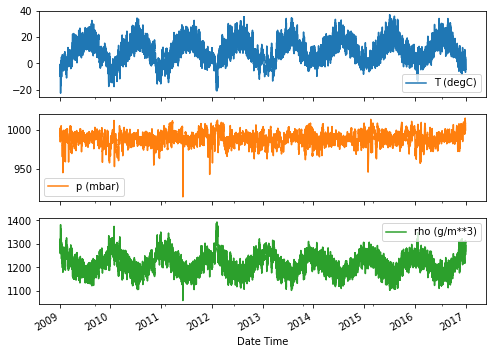

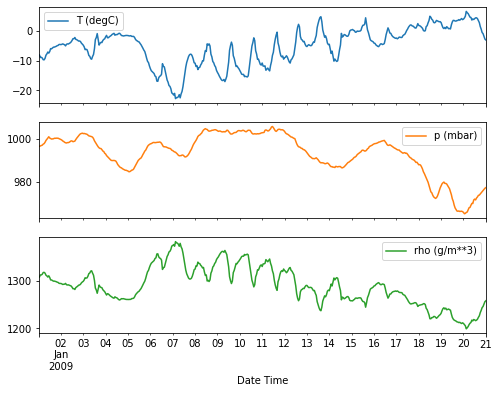

In [6]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

**INSPECT AND CLEANUP**

In [7]:
df.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         70091.0   989.212842   8.358886   913.60   984.20   989.57   
T (degC)         70091.0     9.450482   8.423384   -22.76     3.35     9.41   
Tpot (K)         70091.0   283.493086   8.504424   250.85   277.44   283.46   
Tdew (degC)      70091.0     4.956471   6.730081   -24.80     0.24     5.21   
rh (%)           70091.0    76.009788  16.474920    13.88    65.21    79.30   
VPmax (mbar)     70091.0    13.576576   7.739883     0.97     7.77    11.82   
VPact (mbar)     70091.0     9.533968   4.183658     0.81     6.22     8.86   
VPdef (mbar)     70091.0     4.042536   4.898549     0.00     0.87     2.19   
sh (g/kg)        70091.0     6.022560   2.655812     0.51     3.92     5.59   
H2OC (mmol/mol)  70091.0     9.640437   4.234862     0.81     6.29     8.96   
rho (g/m**3)     70091.0  1216.061232  39.974263  1059.45  1187.47  1213.80   
wv (m/s)         70091.0     1.702567  65.447512 -9999.00     0.99     1.76   
max. wv (m/s)    70091.0     2.963041  75.597657 -9999.00     1.76     2.98   
wd (deg)         70091.0   174.789095  86.619431     0.00   125.30   198.10   

                      75%      max  
p (mbar)          994.720  1015.29  
T (degC)           15.480    37.28  
Tpot (K)          289.530   311.21  
Tdew (degC)        10.080    23.06  
rh (%)             89.400   100.00  
VPmax (mbar)       17.610    63.77  
VPact (mbar)       12.360    28.25  
VPdef (mbar)        5.300    46.01  
sh (g/kg)           7.800    18.07  
H2OC (mmol/mol)    12.490    28.74  
rho (g/m**3)     1242.765  1393.54  
wv (m/s)            2.860    14.01  
max. wv (m/s)       4.740    23.50  
wd (deg)          234.000   360.00

**Wind velocity**

One thing that should stand out is the min value of the wind velocity (wv (m/s)) and the maximum value (max. wv (m/s)) columns. This -9999 is likely erroneous.

There's a separate wind direction column, so the velocity should be greater than zero (>=0). Replace it with zeros:

In [8]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0